In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings

Using TensorFlow backend.
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) o

In [2]:


#Load the project's data
data_climate = pd.read_csv('data_fortaleza-CE.csv')
data_climate.columns = ['codigo_estacao','data','hora','temp_inst','temp_max','temp_min','umid_inst','umid_max','umid_min','pto_orvalho_inst','pto_orvalho_max','pto_orvalho_min','pressao','pressao_max','pressao_min','vento_direcao','vento_vel','vento_rajada','radiacao','precipitacao']


In [3]:
#fix random seed for reproducibility
np.random.seed(0)

#using neural networks recurrents
#network short memory with LSTM, she use backpropagation through time and have memory block instead neruons.
dataset = pd.DataFrame(data_climate[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','vento_direcao','vento_vel']])
dataset = dataset.values
dataset = dataset.astype('float32')

#To reduce the data from [0,1] scale with pre-preprocessing
#Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [4]:
#split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train,test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print('Train dimensions ->{}'.format(train.shape))
print('Test dimensions ->{}'.format(test.shape))


Train dimensions ->(1276, 8)
Test dimensions ->(629, 8)


In [5]:
'''
To define a new dataset
args : the olg dataset(np array),
       look_back(you select times before and number steps for prevent the next period)
'''
# convert an array of values into a dataset matrix
def create_new_dataset(dataset,look_back=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

In [6]:
#In this new_dataset, the fisrt columns is X=t and second is Y=t+1
new_dataset = create_new_dataset(dataset)

#reshape into X = t and Y = t+1
look_back = 1
trainX,trainY = create_new_dataset(train,look_back)
testX,testY = create_new_dataset(test,look_back)

In [7]:
'''
LSTM needs the X(inputs) args this form: [samples,time steps, features], 
now the data is = [samples,features], we uses the numpy.reshape() for reshape
'''
#reshape input to be [samples,time steps, features]
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))


In [8]:
'''
Now, the LSTM!!!

LSTM needs 3 layers : 1ºinput layer
                      2ºhidden layer with 4 LSTM blocks or neural
                      3ºoutput layer

 - General is just one output;
 - Sigmoid function is used for LSTM blocks;
 - For default, is 100 epoch by train.
'''

#To ignore the warnings
warnings.filterwarnings('ignore')

#create and fir the LSTM network
model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=300,batch_size=1,verbose=2)

W0811 10:32:16.251265 140355576202880 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 10:32:16.290640 140355576202880 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 10:32:16.308876 140355576202880 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 10:32:16.654915 140355576202880 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 10:32:17.160343 140355576202880 deprecation.py:323] From /usr/lib/python3.

Epoch 1/300
 - 6s - loss: 0.1007
Epoch 2/300
 - 4s - loss: 0.0554
Epoch 3/300
 - 4s - loss: 0.0517
Epoch 4/300
 - 4s - loss: 0.0506
Epoch 5/300
 - 4s - loss: 0.0509
Epoch 6/300
 - 4s - loss: 0.0505
Epoch 7/300
 - 4s - loss: 0.0507
Epoch 8/300
 - 4s - loss: 0.0506
Epoch 9/300
 - 4s - loss: 0.0504
Epoch 10/300
 - 4s - loss: 0.0505
Epoch 11/300
 - 4s - loss: 0.0504
Epoch 12/300
 - 4s - loss: 0.0502
Epoch 13/300
 - 4s - loss: 0.0502
Epoch 14/300
 - 4s - loss: 0.0502
Epoch 15/300
 - 4s - loss: 0.0501
Epoch 16/300
 - 4s - loss: 0.0498
Epoch 17/300
 - 4s - loss: 0.0502
Epoch 18/300
 - 4s - loss: 0.0498
Epoch 19/300
 - 4s - loss: 0.0498
Epoch 20/300
 - 4s - loss: 0.0501
Epoch 21/300
 - 4s - loss: 0.0496
Epoch 22/300
 - 4s - loss: 0.0497
Epoch 23/300
 - 4s - loss: 0.0497
Epoch 24/300
 - 4s - loss: 0.0498
Epoch 25/300
 - 4s - loss: 0.0494
Epoch 26/300
 - 4s - loss: 0.0494
Epoch 27/300
 - 4s - loss: 0.0498
Epoch 28/300
 - 4s - loss: 0.0495
Epoch 29/300
 - 4s - loss: 0.0493
Epoch 30/300
 - 4s - lo

 - 4s - loss: 0.0453
Epoch 239/300
 - 4s - loss: 0.0452
Epoch 240/300
 - 4s - loss: 0.0451
Epoch 241/300
 - 4s - loss: 0.0453
Epoch 242/300
 - 4s - loss: 0.0452
Epoch 243/300
 - 4s - loss: 0.0452
Epoch 244/300
 - 4s - loss: 0.0453
Epoch 245/300
 - 4s - loss: 0.0452
Epoch 246/300
 - 4s - loss: 0.0451
Epoch 247/300
 - 4s - loss: 0.0453
Epoch 248/300
 - 4s - loss: 0.0450
Epoch 249/300
 - 4s - loss: 0.0451
Epoch 250/300
 - 4s - loss: 0.0451
Epoch 251/300
 - 4s - loss: 0.0453
Epoch 252/300
 - 4s - loss: 0.0452
Epoch 253/300
 - 4s - loss: 0.0452
Epoch 254/300
 - 4s - loss: 0.0450
Epoch 255/300
 - 4s - loss: 0.0452
Epoch 256/300
 - 5s - loss: 0.0450
Epoch 257/300
 - 4s - loss: 0.0451
Epoch 258/300
 - 4s - loss: 0.0451
Epoch 259/300
 - 4s - loss: 0.0451
Epoch 260/300
 - 4s - loss: 0.0450
Epoch 261/300
 - 4s - loss: 0.0450
Epoch 262/300
 - 4s - loss: 0.0449
Epoch 263/300
 - 4s - loss: 0.0448
Epoch 264/300
 - 4s - loss: 0.0450
Epoch 265/300
 - 4s - loss: 0.0450
Epoch 266/300
 - 4s - loss: 0.0449

In [9]:
#Try inverse predictions

#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.21 RMSE
Test Score: 0.32 RMSE


In [11]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [12]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

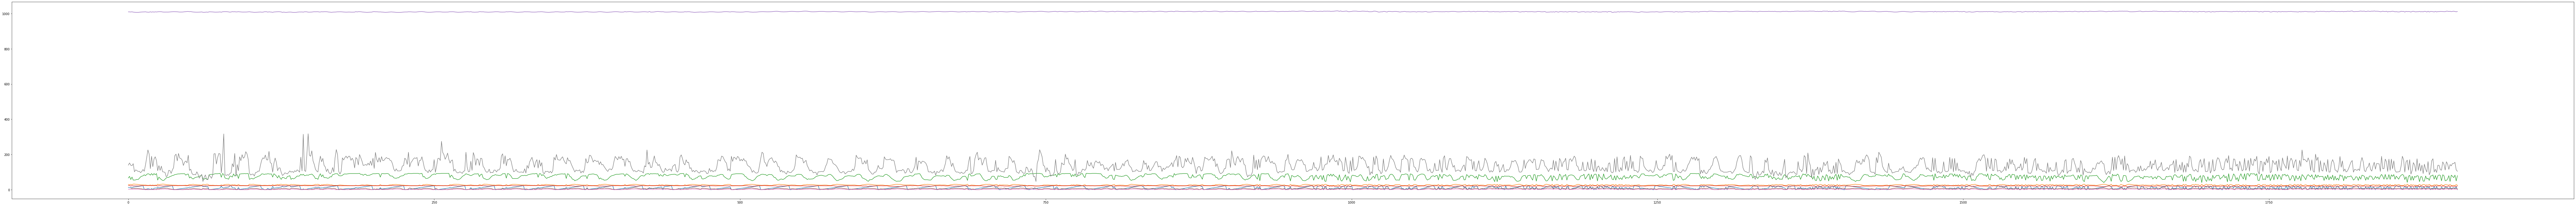

In [13]:
# plot baseline and predictions
plt.rcParams['figure.figsize'] = (152,12)
plt.plot(scaler.inverse_transform(dataset))

In [14]:
trainPredictPlot.shape

(1905, 8)

In [15]:
testPredictPlot.shape

(1905, 8)

In [16]:
trainPredict.shape

(1274, 1)

In [17]:
testPredict.shape

(627, 1)

In [18]:
trainPredict

array([[0.5633824 ],
       [0.49009624],
       [0.5998244 ],
       ...,
       [0.6735555 ],
       [0.6364031 ],
       [0.5998244 ]], dtype=float32)

In [19]:
testPredict

array([[0.49009624],
       [0.41523498],
       [0.37712273],
       [0.33881864],
       [0.20064038],
       [0.26414156],
       [0.17824736],
       [0.23008814],
       [0.30085257],
       [0.75279105],
       [0.7151246 ],
       [0.7051326 ],
       [0.6735555 ],
       [0.6568773 ],
       [0.79740405],
       [0.7910783 ],
       [0.5998244 ],
       [0.5633824 ],
       [0.52687013],
       [0.49009624],
       [0.45290983],
       [0.41523498],
       [0.37712273],
       [0.33881864],
       [0.30085257],
       [0.26414156],
       [0.23008814],
       [0.20064038],
       [0.17824736],
       [0.16563085],
       [0.6364031 ],
       [0.16530861],
       [0.754251  ],
       [0.754251  ],
       [0.7151246 ],
       [0.6735555 ],
       [0.6364031 ],
       [0.5998244 ],
       [0.5633824 ],
       [0.52687013],
       [0.49009624],
       [0.41523498],
       [0.37712273],
       [0.30085257],
       [0.26414156],
       [0.23008814],
       [0.20064038],
       [0.178

In [20]:
trainX.shape

(1274, 1, 1)

In [21]:
trainX

array([[[0.5652174 ]],

       [[0.47826087]],

       [[0.6086957 ]],

       ...,

       [[0.6956522 ]],

       [[0.65217394]],

       [[0.6086957 ]]], dtype=float32)

In [22]:
testX.shape

(627, 1, 1)

In [23]:
testX

array([[[0.47826087]],

       [[0.39130434]],

       [[0.3478261 ]],

       [[0.30434784]],

       [[0.13043478]],

       [[0.21739131]],

       [[0.08695652]],

       [[0.17391305]],

       [[0.26086956]],

       [[0.9130435 ]],

       [[0.73913044]],

       [[0.95652175]],

       [[0.6956522 ]],

       [[1.        ]],

       [[0.86956525]],

       [[0.826087  ]],

       [[0.6086957 ]],

       [[0.5652174 ]],

       [[0.5217391 ]],

       [[0.47826087]],

       [[0.43478262]],

       [[0.39130434]],

       [[0.3478261 ]],

       [[0.30434784]],

       [[0.26086956]],

       [[0.21739131]],

       [[0.17391305]],

       [[0.13043478]],

       [[0.08695652]],

       [[0.04347826]],

       [[0.65217394]],

       [[0.        ]],

       [[0.7826087 ]],

       [[0.7826087 ]],

       [[0.73913044]],

       [[0.6956522 ]],

       [[0.65217394]],

       [[0.6086957 ]],

       [[0.5652174 ]],

       [[0.5217391 ]],

       [[0.47826087]],

       [[0.39130

In [ ]:
plt.plot(data_climate.vento_vel)

In [ ]:
data_climate.vento_vel

In [ ]:
trainX.describe()